In [2]:
import pickle
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.axes._axes import _log
_log.setLevel("ERROR")

from parallel_betweenness import betweenness_centrality_parallel

%matplotlib inline

seed = 42
n_processes = 7

In [3]:
np.random.seed(seed)

with open("data/edges.pkl", "rb") as f:
    G = nx.Graph()
    G.add_edges_from(pickle.load(f))
G.remove_nodes_from(set(nx.nodes(G)) - max(nx.connected_components(G), key=len))
node_list = list(G.nodes())

print(f"nodes: {len(node_list)}")
print(f"edges: {len(G.edges())}")

d = {"nconst": node_list}
df_actor_info = pd.DataFrame(d)
df_actor_info["degree"] = df_actor_info["nconst"].apply(G.degree)
print(df_actor_info.shape)

betweenness = betweenness_centrality_parallel(G, processes=n_processes)
df_betweenness = pd.DataFrame(betweenness.items(), columns=["nconst", "betweenness"])
df_actor_info = df_actor_info.merge(df_betweenness, how="left")
print(df_actor_info.shape)

df_actor_info

nodes: 13406
edges: 390859
(13406, 2)
(13406, 3)


,nconst,degree,betweenness
0,nm0524999,58,0.000009
1,nm0286097,124,0.000059
2,nm0045119,359,0.001030
3,nm1097721,66,0.000026
4,nm0619324,114,0.000292
...,...,...,...
13401,nm0030278,2,0.000301
13402,nm10051372,1,0.000000
13403,nm6618195,1,0.000000
13404,nm7863128,1,0.000000


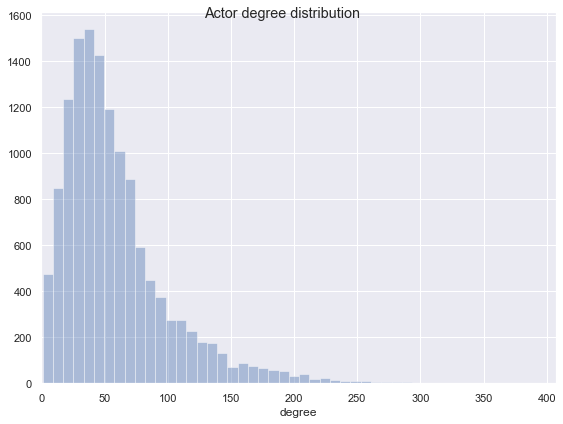

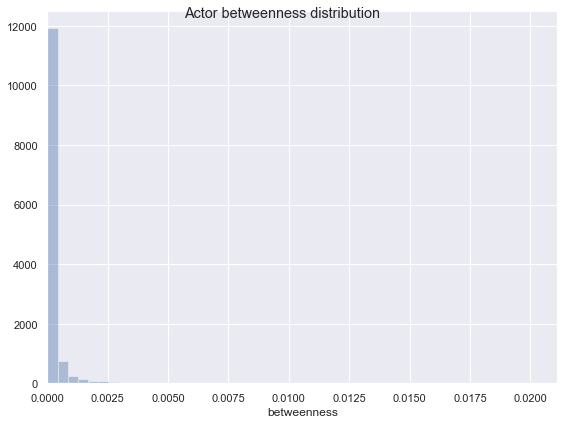

In [4]:
sns.set()

plt.figure(figsize=(8, 6))
sns.distplot(df_actor_info["degree"], kde=False)
plt.xlim(0, df_actor_info["degree"].max())
plt.suptitle("Actor degree distribution")
plt.savefig(f"results/actor_degree_distrib.pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.distplot(df_actor_info["betweenness"], kde=False)
plt.xlim(0, df_actor_info["betweenness"].max())
plt.suptitle("Actor betweenness distribution")
plt.savefig(f"results/actor_betweenness_distrib.pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()